In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import gc
plt.rc('font', family='simsun', size=12)

In [2]:
u_title = pd.read_excel('title.xlsx',sheet_name='tb_rp_mk_crso_agent_author_day')
user = pd.read_table('users.info',sep='|',header=None,iterator=True)

In [3]:
u_title

,csaprp.tb_rp_mk_crso_agent_author_day,Unnamed: 1,众包会员资格监控日报表
0,statis_year,varchar(4),统计年份
1,statis_date,varchar(8),统计日期
2,agent_num,varchar(20),会员工号
3,acount_name,varchar(150),会员姓名
4,star_level,varchar(20),会员星级
5,channel_name,varchar(600),所属单位
6,channe_lid,varchar(40),所属单位id
7,business_code,varchar(50),项目编号
8,business_name,varchar(300),项目名称
9,prov_code,varchar(5),省份


# 去除一部分没用的列

In [4]:
title = list(u_title.loc[:,'众包会员资格监控日报表'])
s_title = []
for i in [0,1,2,3,4,8,10,11,12,13,14,15,16,17,18,19,20,21,25,26,30,31,32]:
    s_title.append(title[i])
print(s_title)

['统计年份', '统计日期', '会员工号', '会员姓名', '会员星级', '项目名称', '省份名称', '项目单价', '总拨打量', '总接通量', '在线办理数', '线下办理数', '办理率', '平均通话时长(s)', '签入总时长（s)', '通话总时长(s)', '整理总时长(s)', '空闲总时长（s）', '资格获取时间', '资格结束时间', '一级分类名称', '二级分类名称', '三级分类名称']


In [5]:
count = pd.DataFrame()
loop = True
while loop:
    try:
        d = user.get_chunk(500000)
        d.columns = title
        #d.fillna('',inplace=True)
        d = d.loc[d['办理率']!=0]
        count = count.append(d[s_title],ignore_index=True)
        del d
        gc.collect()
    except StopIteration:
        print('done')
        loop = False    

/home/lidongdong/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2662: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_cell, store_history, silent, shell_futures)
/home/lidongdong/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2662: DtypeWarning: Columns (30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_cell, store_history, silent, shell_futures)
/home/lidongdong/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2662: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_cell, store_history, silent, shell_futures)
/home/lidongdong/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2662: DtypeWarning: Columns (36) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_cell, store_history, silent, shell_futures)


done


# 办理率有一部分计算错误，只取办理率小于等于1的情况

In [6]:
count['new_办理率'] = (count['在线办理数']+count['线下办理数'])/count['总接通量']

In [7]:
new_count = count[count['new_办理率']<=1]

In [8]:
count.shape[0],new_count.shape[0]

(2581461, 2563598)

In [19]:
def get_s(df):
    res = pd.Series()
    res['new_办理率'] = df['new_办理率'].mean()
    return res
def get_s2(df):
    res = pd.Series()
    res['办理率'] = df['办理率'].mean()
    return res
def get_m(df):
    res = pd.Series()
    res['办理率'] = df['new_办理率'].mean()
    res['星级'] = df['会员星级'].values[0]
    res['总接通量'] = df['总接通量'].sum()
    res['平均通话时长'] = df['平均通话时长(s)'].mean()
    res['总通话时长'] = df['通话总时长(s)'].sum()
    return res

# 项目二级分类名称

In [10]:
second_p = new_count.groupby('二级分类名称').apply(get_s)

In [11]:
second_p

,new_办理率
二级分类名称,
体验类,0.193194
增值业务类,0.117757
套餐类,0.078850
宽带类,0.147244
承诺低消类,0.107574
流量类,0.098041
调研类,0.555534
通知类,0.588513


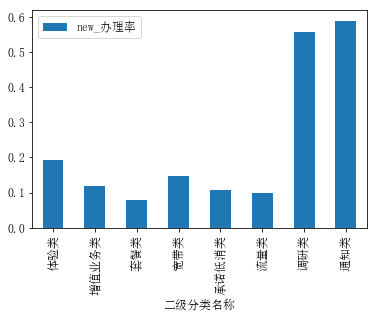

In [12]:
plt.rc('font', family='simsun', size=12)
second_p.plot.bar()

# 项目单价

In [13]:
money = new_count.groupby('项目单价').apply(get_s)

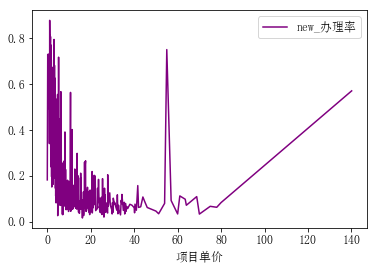

In [14]:
money.plot.line(color='purple')

# 会员星级

In [15]:
star = new_count.groupby('会员星级').apply(get_s)

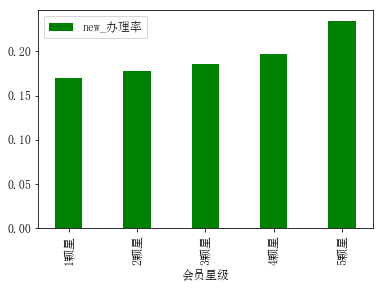

In [16]:
star.plot.bar(color='green',width=0.4)

In [36]:
pro = new_count[new_count['项目名称']=='黑龙江省感恩回馈套餐优惠营销（40、50、60元档位）【在线办理】（06——05）']

In [104]:
member = new_count.groupby('会员工号').apply(get_m)

# 从二级项目名称中抽取两类，套餐和通知类

In [17]:
taocan = new_count[new_count['二级分类名称']=='套餐类']
mem_taocan = taocan.groupby('会员工号').apply(get_m)

In [18]:
tongzhi = new_count[new_count['二级分类名称']=='通知类']
mem_tongzhi = tongzhi.groupby('会员工号').apply(get_m)

In [23]:
star_taocan = mem_taocan.groupby('星级').apply(get_s2)
star_taocan

,办理率
星级,
1颗星,0.070577
2颗星,0.079807
3颗星,0.096785
4颗星,0.105470
5颗星,0.106926


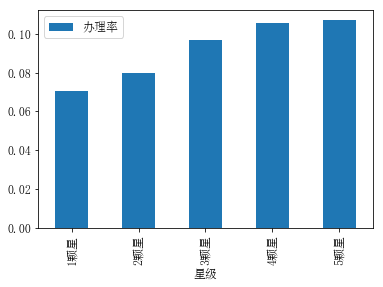

In [31]:
star_taocan.plot(kind='bar')

In [26]:
star_tongzhi = mem_tongzhi.groupby('星级').apply(get_s2)
star_tongzhi

,办理率
星级,
1颗星,0.511033
2颗星,0.483392
3颗星,0.519516
4颗星,0.556357
5颗星,0.582721


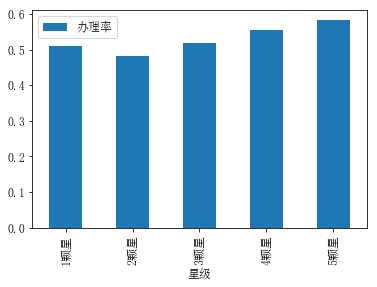

In [30]:
star_tongzhi.plot(kind='bar')

In [120]:
high_taocan = mem_taocan[mem_taocan['办理率']>0.075]
low_taocan = mem_taocan[mem_taocan['办理率']<=0.075]

In [127]:
(high_taocan['总通话时长'].max(),high_taocan['总通话时长'].min()),(low_taocan['总通话时长'].max(),low_taocan['总通话时长'].min())

((1222237.0, 65.0), (1421949.0, 595.0))

In [128]:
(high_taocan['平均通话时长'].max(),high_taocan['平均通话时长'].min()),(low_taocan['平均通话时长'].max(),low_taocan['平均通话时长'].min())

((724.0, 14.0), (215.0, 17.43))

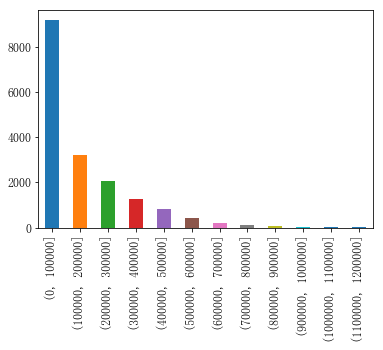

In [119]:
fanwei = list(range(0,1230000,100000))
fenzu = pd.cut(high_taocan['总通话时长'],fanwei)
pinshu = pd.value_counts(fenzu)
pinshu.plot(kind='bar')

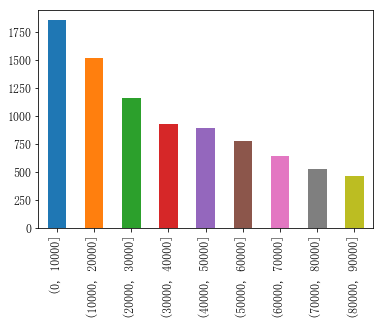

In [124]:
fanwei = list(range(0,100000,10000))
fenzu = pd.cut(high_taocan['总通话时长'],fanwei)
pinshu = pd.value_counts(fenzu)
pinshu.plot(kind='bar')

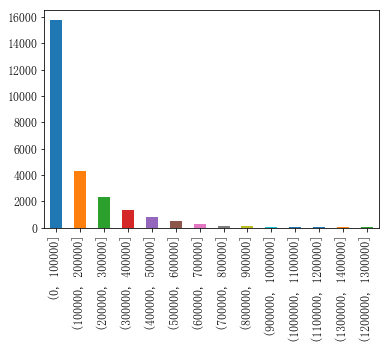

In [122]:
fanwei = list(range(0,1430000,100000))
fenzu = pd.cut(low_taocan['总通话时长'],fanwei)
pinshu = pd.value_counts(fenzu)
pinshu.plot(kind='bar')

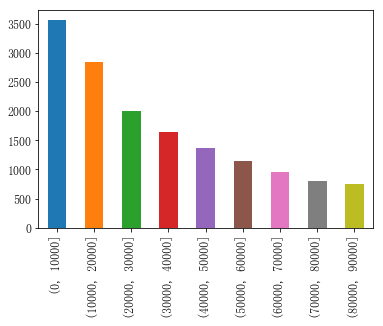

In [125]:
fanwei = list(range(0,100000,10000))
fenzu = pd.cut(low_taocan['总通话时长'],fanwei)
pinshu = pd.value_counts(fenzu)
pinshu.plot(kind='bar')

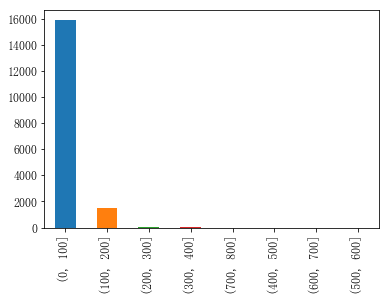

In [108]:
fanwei = list(range(0,801,100))
fenzu = pd.cut(high_taocan['平均通话时长'],fanwei)
pinshu = pd.value_counts(fenzu)
pinshu.plot(kind='bar')

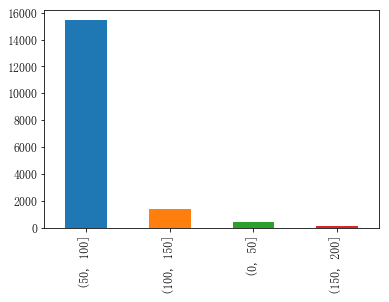

In [130]:
fanwei = list(range(0,220,50))
fenzu = pd.cut(high_taocan['平均通话时长'],fanwei)
pinshu = pd.value_counts(fenzu)
pinshu.plot(kind='bar')

In [46]:
mem_tongzhi.groupby('星级').apply(get_s2)

,new_办理率
星级,
1颗星,0.511033
2颗星,0.483392
3颗星,0.519516
4颗星,0.556357
5颗星,0.582721


In [53]:
mem_taocan.groupby('星级')

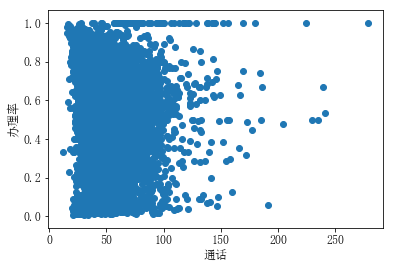

In [49]:
plt.xlabel('通话')
plt.ylabel('办理率')
plt.scatter(mem_tongzhi['平均通话时长'],mem_tongzhi['办理率'])

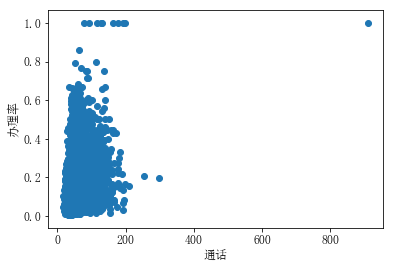

In [29]:
plt.xlabel('通话')
plt.ylabel('办理率')
plt.scatter(mem_tiyan['平均通话时长'],mem_tiyan['办理率'])

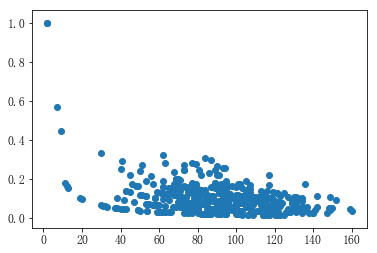

In [58]:
p = pro.set_index('总接通量')
plt.scatter(p.index,p['new_办理率'])

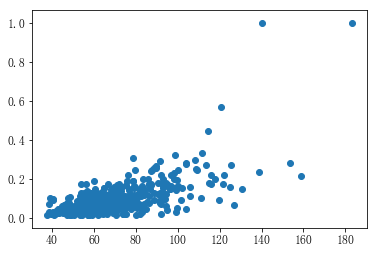

In [70]:
p = pro.set_index('平均通话时长(s)')
plt.scatter(p.index,p['new_办理率'])

In [69]:
count.groupby('二级分类名称').size()

二级分类名称
         414522
体验类       26198
增值业务类    116141
套餐类      928594
宽带类       38520
承诺低消类     65340
流量类      588421
调研类      168627
通知类      235098
dtype: int64

In [131]:
#out.to_excel('user_.xlsx')